In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df_weather = pd.read_csv('..\\ML\\data\\raw\\Summary_of_Weather.csv')
df_stations = pd.read_csv('..\\ML\\data\\raw\\Weather_Station_Locations.csv')

C:\Users\ignat\AppData\Local\Temp\ipykernel_19996\3871240699.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_weather = pd.read_csv('..\\ML\\data\\raw\\Summary_of_Weather.csv')


In [4]:
df_weather.info()
df_weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110707 entries, 0 to 110706
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          110707 non-null  int64  
 1   Date         110707 non-null  object 
 2   Precip       110707 non-null  object 
 3   WindGustSpd  495 non-null     float64
 4   MaxTemp      110707 non-null  float64
 5   MinTemp      110707 non-null  float64
 6   MeanTemp     110707 non-null  float64
 7   Snowfall     109640 non-null  object 
 8   PoorWeather  31850 non-null   object 
 9   YR           110707 non-null  int64  
 10  MO           110707 non-null  int64  
 11  DA           110707 non-null  int64  
 12  PRCP         108914 non-null  object 
 13  DR           496 non-null     float64
 14  SPD          495 non-null     float64
 15  MAX          110263 non-null  float64
 16  MIN          110272 non-null  float64
 17  MEA          110243 non-null  float64
 18  SNF          109640 non-

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_weather.isnull().sum() #checking for total null values

STA                 0
Date                0
Precip              0
WindGustSpd    110212
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1067
PoorWeather     78857
YR                  0
MO                  0
DA                  0
PRCP             1793
DR             110211
SPD            110212
MAX               444
MIN               435
MEA               464
SNF              1067
SND            105529
FT             110707
FB             110707
FTI            110707
ITH            110707
PGT            110218
TSHDSBRSGF      78857
SD3            110707
RHX            110707
RHN            110707
RVG            110707
WTE            110707
dtype: int64

Очень много пустых ячеек

In [5]:
df_stations.info()
df_stations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              150 non-null    int64  
 1   NAME              150 non-null    object 
 2   STATE/COUNTRY ID  150 non-null    object 
 3   LAT               150 non-null    object 
 4   LON               150 non-null    object 
 5   ELEV              150 non-null    int64  
 6   Latitude          150 non-null    float64
 7   Longitude         150 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 9.5+ KB


,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


Количество стран:  60
Общее количество метеостанций:  150


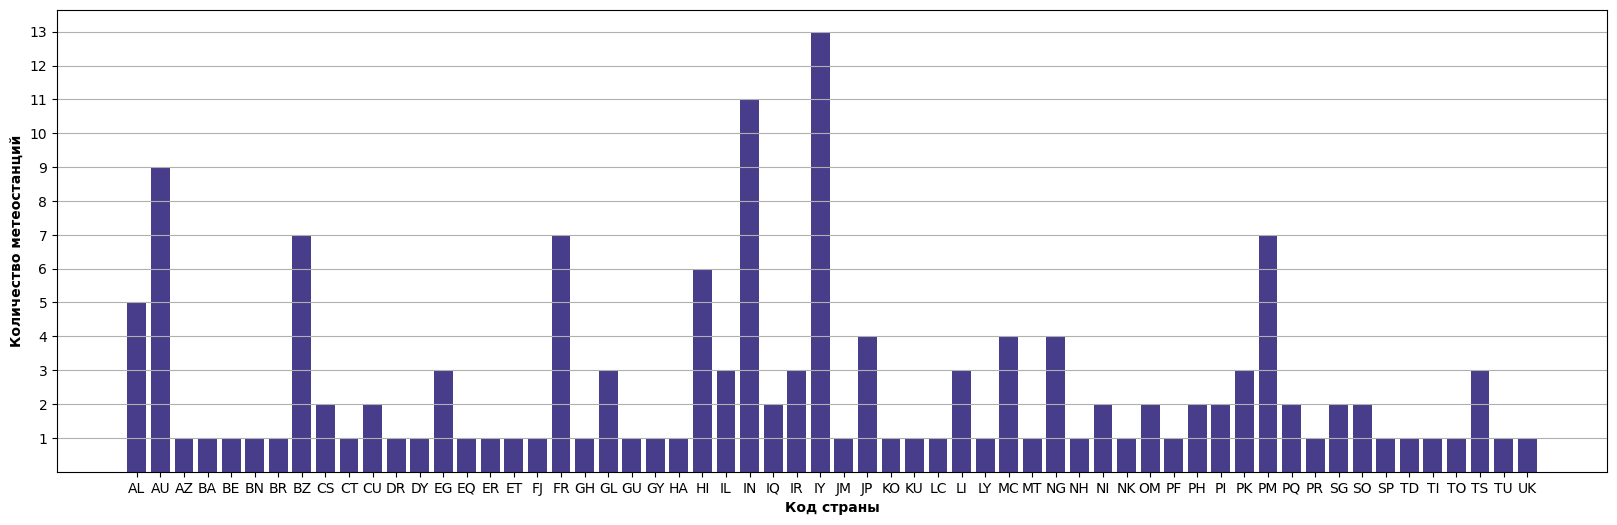

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(20,6)

countries = df_stations['STATE/COUNTRY ID'].unique()
state_count = 0
station_count = []

for country in countries:
    station_count.append(df_stations['WBAN'].loc[df_stations['STATE/COUNTRY ID'] == country].count())
    state_count += 1
print('Количество стран: ', state_count)
print('Общее количество метеостанций: ', sum(station_count))
ax.bar(countries, station_count, color='darkslateblue')
plt.yticks(np.arange(min(station_count), max(station_count)+1, 1.0))
plt.xlabel('Код страны', fontweight='bold')
plt.ylabel('Количество метеостанций', fontweight='bold')
plt.grid(axis='y')
plt.show()

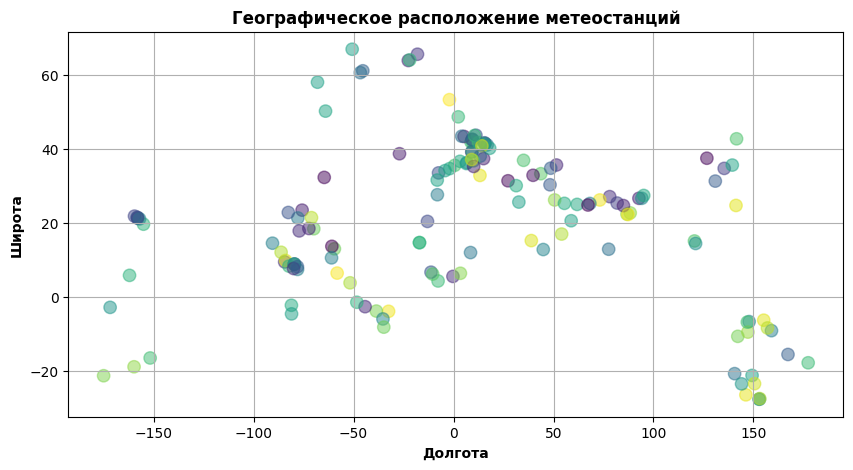

In [7]:
lon = df_stations['Longitude']
lat = df_stations['Latitude']

rng = np.random.RandomState(0)
colors = rng.rand(150)
plt.figure(figsize=(10,5))
plt.scatter(lon, lat, c=colors, s=80, alpha=0.5)
plt.title('Географическое расположение метеостанций', fontweight='bold')
plt.xlabel('Долгота', fontweight='bold')
plt.ylabel('Широта', fontweight='bold')
plt.grid()
plt.show()

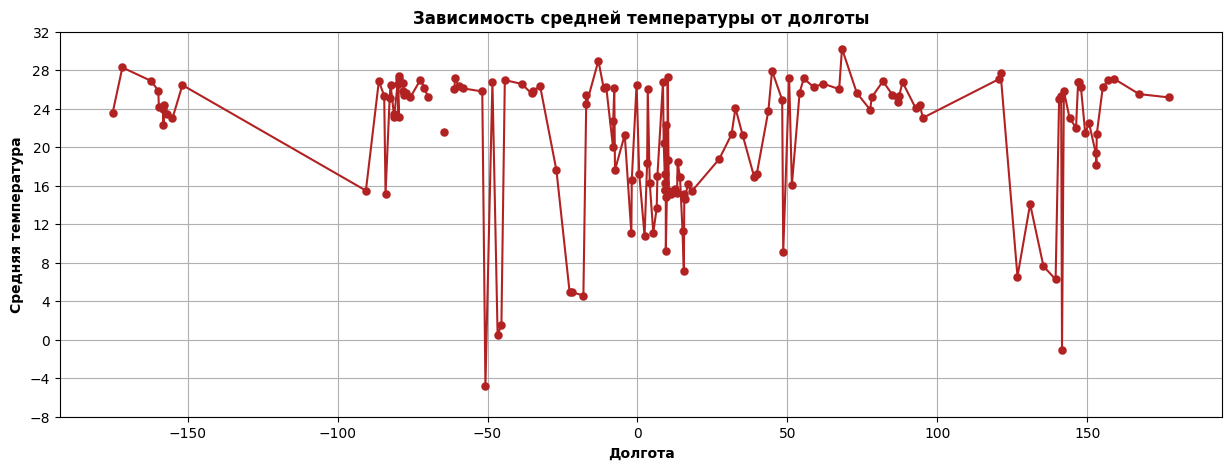

In [8]:
lons = np.sort(df_stations['Longitude'].unique())
temp = []
sta_num = 0

for lon in lons:
    sta_num = df_stations['WBAN'].loc[df_stations['Longitude'] == lon].item()
    temp.append(df_weather['MeanTemp'].loc[df_weather['STA'] == sta_num].mean())

plt.figure(figsize=(15,5))
plt.plot(lons, temp, '-o', markeredgewidth=0.1, color='firebrick')
plt.yticks(np.arange(-8, 32+1, 4.0))
plt.title('Зависимость средней температуры от долготы', fontweight='bold')
plt.xlabel('Долгота', fontweight='bold')
plt.ylabel('Средняя температура', fontweight='bold')
plt.grid()
plt.show()

При анализе зависимости средней температуры от долготы какого-то четкого закона обнаружено не было

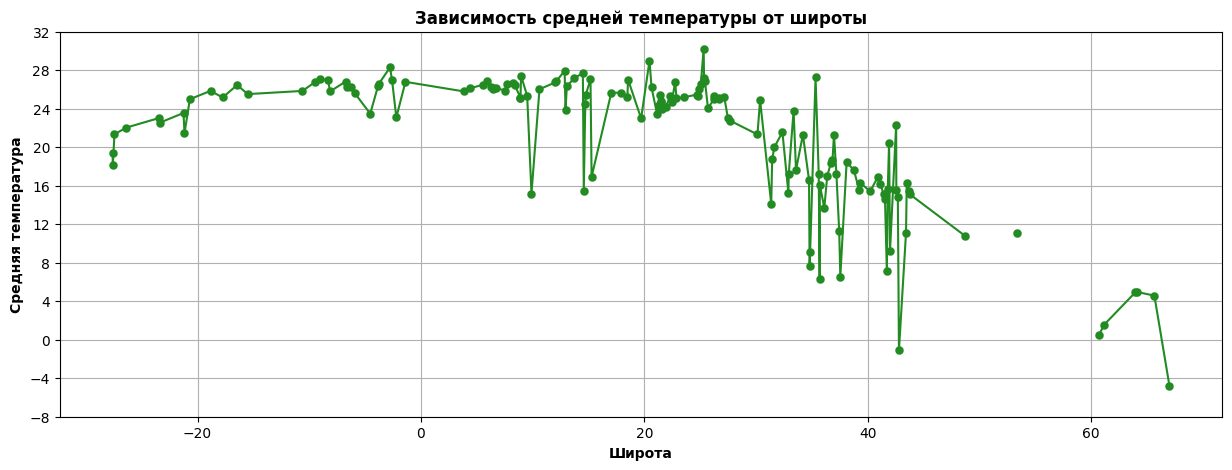

In [9]:
lats = np.sort(df_stations['Latitude'])
temp = []
pre_temp = []
sta_num = 0

for lat in lats:
    sta_num = df_stations['WBAN'].loc[df_stations['Latitude'] == lat]
    if (len(sta_num) == 1):
        temp.append(df_weather['MeanTemp'].loc[df_weather['STA'] == sta_num.item()].mean())
    else:
        for sn in sta_num:
            pre_temp.append(df_weather['MeanTemp'].loc[df_weather['STA'] == sn].mean())
        temp.append(sum(pre_temp)/len(pre_temp))

plt.figure(figsize=(15,5))
plt.plot(lats, temp, '-o', markeredgewidth=0.1, color='forestgreen')
plt.yticks(np.arange(-8, 32+1, 4.0))
plt.title('Зависимость средней температуры от широты', fontweight='bold')
plt.xlabel('Широта', fontweight='bold')
plt.ylabel('Средняя температура', fontweight='bold')
plt.grid()
plt.show()

При анализе зависимости средней температуры от широты расположения метеостанции уже видна более чёткая закономерность. Можно брать в качестве признака для обучения

2326


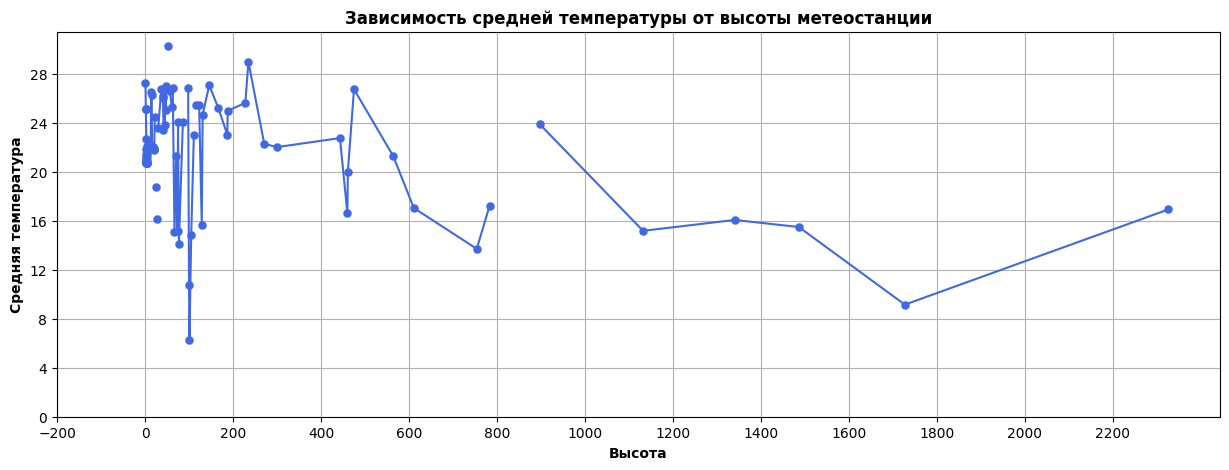

In [10]:
# убираем строки, где высота метеостанции неизвестна
df_stations_flt = df_stations.loc[df_stations['ELEV'] != 9999]

elevations = np.sort(df_stations_flt['ELEV'])
temp = []
pre_temp = []
sta_num = 0

print(max(elevations))

for elev in elevations:
    sta_num = df_stations_flt['WBAN'].loc[df_stations_flt['ELEV'] == elev]
    if (len(sta_num) == 1):
        temp.append(df_weather['MeanTemp'].loc[df_weather['STA'] == sta_num.item()].mean())
    else:
        for sn in sta_num:
            pre_temp.append(df_weather['MeanTemp'].loc[df_weather['STA'] == sn].mean())
        temp.append(sum(pre_temp)/len(pre_temp))

plt.figure(figsize=(15,5))
plt.plot(elevations, temp, '-o', markeredgewidth=0.1, color='royalblue')
plt.xticks(np.arange(-200, 2400, 200.0))
plt.yticks(np.arange(0, 32, 4.0))
plt.title('Зависимость средней температуры от высоты метеостанции', fontweight='bold')
plt.xlabel('Высота', fontweight='bold')
plt.ylabel('Средняя температура', fontweight='bold')
plt.grid()
plt.show()

При анализе взаимосвязи средней температуры и высоты метеостанции также не было обнаружено чёткой зависимости

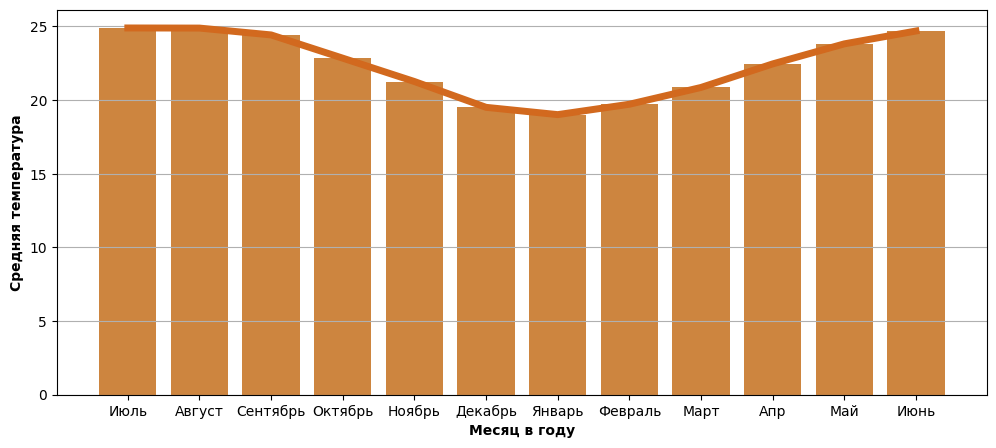

In [11]:
months_dict = {1: 'Январь', 2: 'Февраль', 3: 'Март', 
               4: 'Апр', 5: 'Май', 6: 'Июнь', 7: 'Июль', 
               8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 
               11: 'Ноябрь', 12: 'Декабрь'}

fig, ax = plt.subplots()
fig.set_size_inches(12,5)
months_num = df_weather['MO'].unique()
months_name = []
temp = []
for month in months_num:
    temp.append(df_weather['MeanTemp'].loc[df_weather['MO'] == month].mean())
    months_name.append(months_dict.get(month))
ax.bar(months_name, temp, color='peru')
ax.plot(months_name, temp, lw=5, color='chocolate')
plt.xlabel('Месяц в году', fontweight='bold')
plt.ylabel('Средняя температура', fontweight='bold')
plt.grid(axis='y')
plt.show()

Средняя температура однозначно зависит от месяца, поэтому берем этот признак для обучения

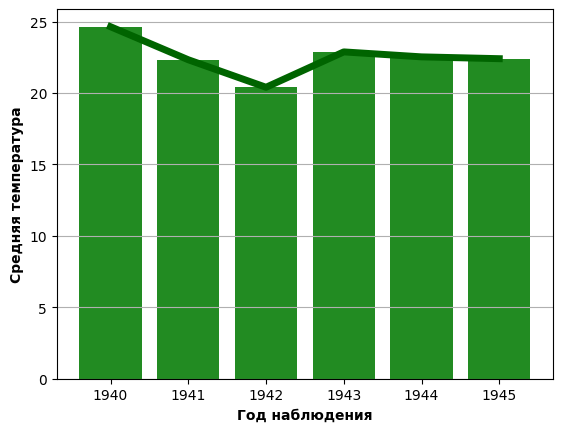

In [12]:
fig, ax = plt.subplots()
years = np.sort(df_weather['YR'].unique())
full_years = []
temp = []
for year in years:
    temp.append(df_weather['MeanTemp'].loc[df_weather['YR'] == year].mean())
    full_years.append(1900 + year)
ax.bar(full_years, temp, color='forestgreen')
ax.plot(full_years, temp, lw=5, color='darkgreen')
plt.xlabel('Год наблюдения', fontweight='bold')
plt.ylabel('Средняя температура', fontweight='bold')
plt.grid(axis='y')
plt.show()

Явного закона изменения средней температуры в зависимости от года наблюдения не выявлено

In [13]:
df_weather.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
STA,110707.0,NaN,NaN,NaN,29644.114374,20941.220919,10001.0,11801.0,22508.0,33501.0,82506.0
Date,110707,2192,1945-4-21,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precip,110707,531,0,59746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpd,495.0,NaN,NaN,NaN,37.982836,10.241134,18.52,29.632,37.04,43.522,75.932
MaxTemp,110707.0,NaN,NaN,NaN,27.051326,8.710836,-32.777778,25.555556,29.444444,31.666667,50.0
MinTemp,110707.0,NaN,NaN,NaN,17.793952,8.324881,-37.777778,15.0,21.111111,23.333333,34.444444
MeanTemp,110707.0,NaN,NaN,NaN,22.417292,8.28851,-35.0,20.555556,25.555556,27.222222,40.0
Snowfall,109640.0,43.0,0.0,77771.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PoorWeather,31850,40,1,24048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR,110707.0,NaN,NaN,NaN,43.805351,1.138339,40.0,43.0,44.0,45.0,45.0


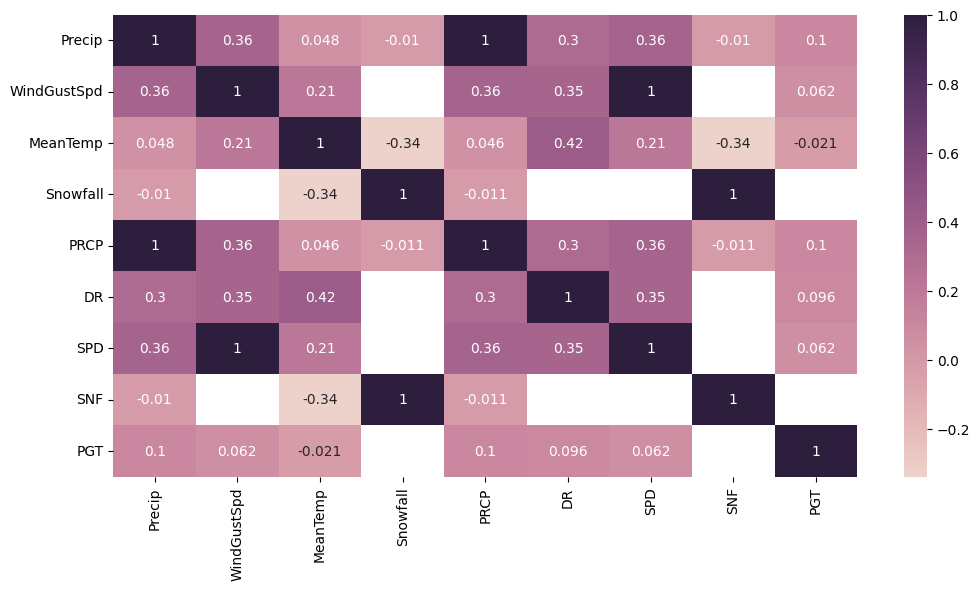

In [14]:
df_weather_corr = df_weather[['Precip', 'WindGustSpd', 'MeanTemp', 'Snowfall', 'PRCP', 'DR', 'SPD', 'SNF', 'PGT']]
df_weather_corr = df_weather_corr.replace('#VALUE!', np.nan)
df_weather_corr = df_weather_corr.replace('T', np.nan)
corr = df_weather_corr.corr()
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [16]:
df_stations.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
WBAN,150.0,NaN,NaN,NaN,33940.086667,21213.756834,10001.0,15171.25,32906.5,34149.25,82506.0
NAME,150,149,BASTIA/CORSICA,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STATE/COUNTRY ID,150,60,IY,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LAT,150,146,2616N,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LON,150,148,07936W,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ELEV,150.0,NaN,NaN,NaN,467.806667,1805.314696,1.0,10.0,28.5,99.5,9999.0
Latitude,150.0,NaN,NaN,NaN,20.465333,21.552865,-27.6,7.558333,22.608333,36.316667,67.016667
Longitude,150.0,NaN,NaN,NaN,8.865667,86.408716,-175.0,-56.6,8.916667,65.8875,177.366667
